<a href="https://colab.research.google.com/github/WorkwithAbhinav/Playstore-Project/blob/main/google_play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#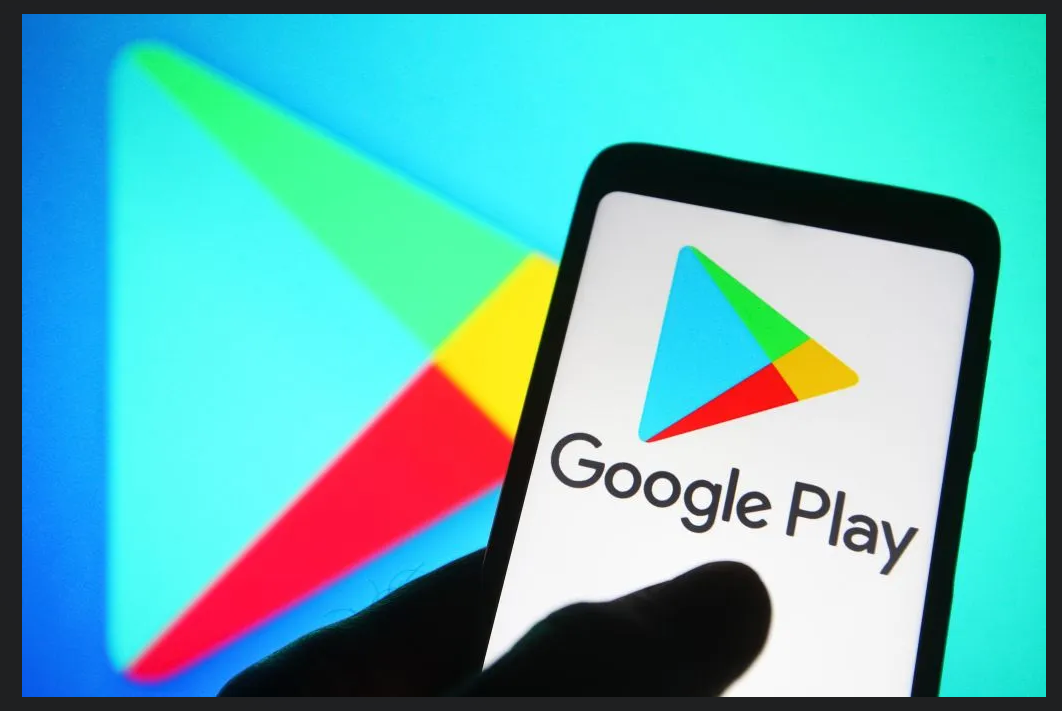Model to predict Rating of the apps on Google play store

# IMPORTING LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#**IMPORTING DATASET **
## Dataset containss all the data related to the application incluing the rating which will be used for classification further

In [ ]:
df = pd.read_csv('googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Dropping the unnecessory series of data
### Dropping :-  'Last Updated' , 'Current Ver' , 'Android Ver' do not provide any impact on the data that is used for prediction

In [ ]:
df = df.drop(['Last Updated' , 'Current Ver' , 'Android Ver'] , axis =1)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [ ]:
cat_arr = df['Category'].value_counts()

In [ ]:
cat_arr.head()

FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

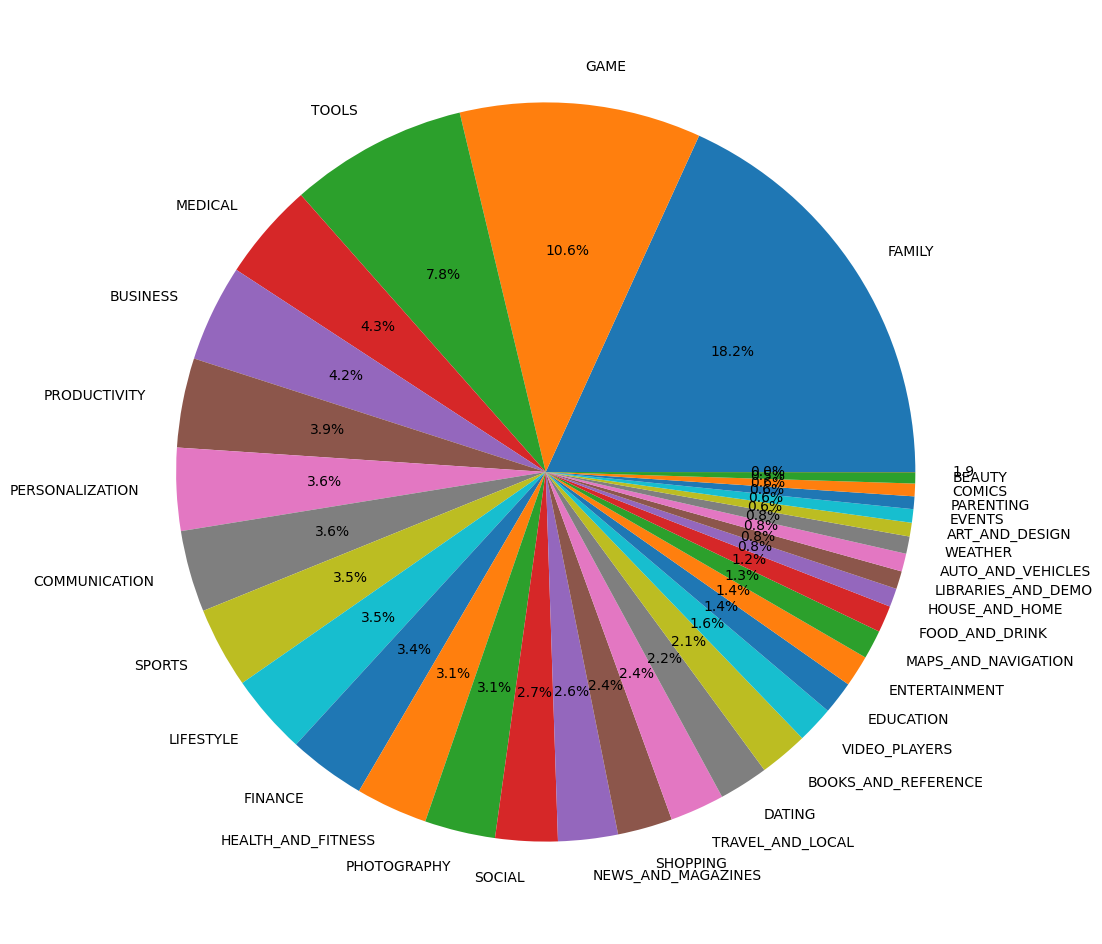

In [ ]:
plt.figure(figsize=(16, 12))
plt.pie(cat_arr , labels = cat_arr.index , autopct ='%1.1f%%')
plt.show()

In [ ]:
df['Rating'].value_counts().head()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
Name: Rating, dtype: int64

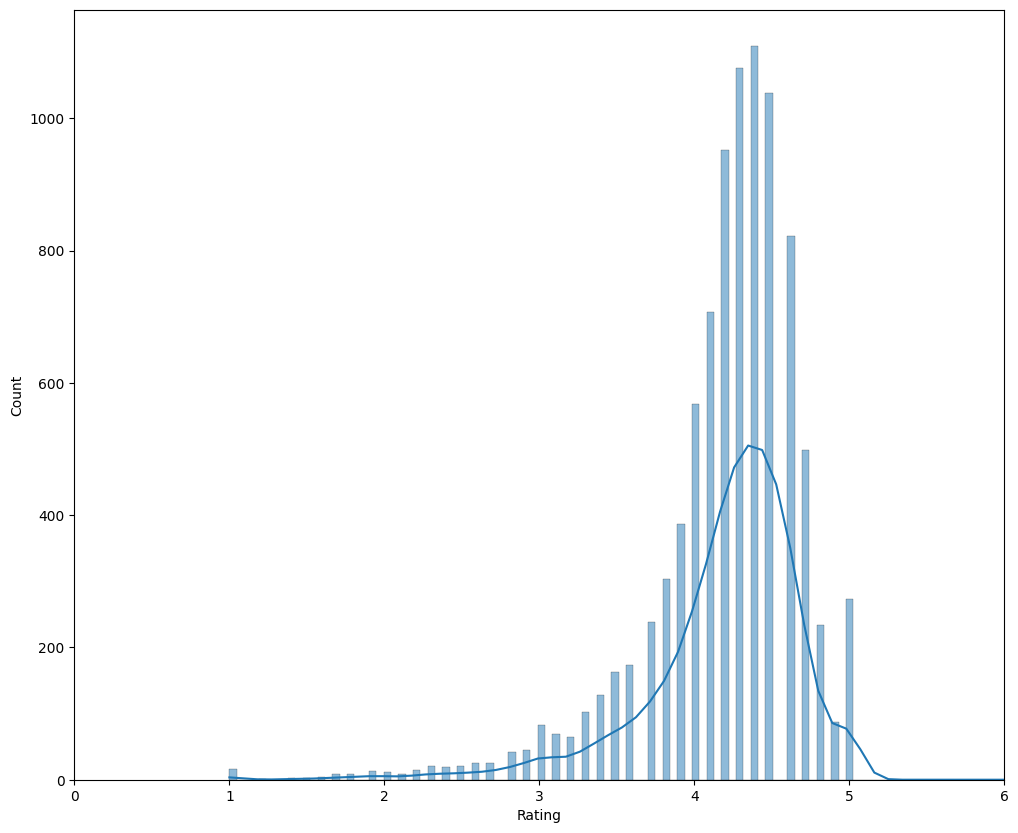

In [ ]:
plt.figure(figsize =(12 , 10))
sns.histplot(df['Rating'] , kde = True)
plt.xlim(0,6.0)
plt.show()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


In [ ]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

#***Preprocessing***

In [ ]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [ ]:
df = df.drop(df.index[10472])
df["Reviews"] = df['Reviews'].astype(int)

In [ ]:
df['Reviews'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10840 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10840 non-null  int64
dtypes: int64(1)
memory usage: 169.4 KB


In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df['Size']= df['Size'].str.replace('M','000')
df['Size']= df['Size'].str.replace('k','')
df['Size']= df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
for i in df['Size']:
  if i < 10:
    df['Size'] = df['Size'].replace(i, i*1000)
df['Size'] = df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
toremove = ['$' , '+' , ',']
colstoclean = ['Installs' , 'Price']
for item in toremove :
  for col in colstoclean :
    df[col] = df[col].str.replace(item , '')
df.head()

<ipython-input-21-dd5452ef9d1d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace(item , '')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity


In [ ]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 931.6+ KB


#**Data Cleaning** ▶
##removing or processing null values as per the requirement

In [ ]:
null = pd.DataFrame({'Null Values ': df.isna().sum().sort_values(ascending =False)})
null

,Null Values
Size,1695
Rating,1474
Type,1
App,0
Category,0
Reviews,0
Installs,0
Price,0
Content Rating,0
Genres,0


In [ ]:
null.index

Index(['Size', 'Rating', 'Type', 'App', 'Category', 'Reviews', 'Installs',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

In [ ]:
median_Value = df['Rating'].median()
df['Rating'].fillna(median_Value , inplace = True)
median_Value

4.3

In [ ]:
median_Value = df['Size'].median()
df['Size'].fillna(median_Value , inplace = True)
median_Value

13.0

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
dtype: int64

#**Data visualization** ▶
## visualizing data for better understanding

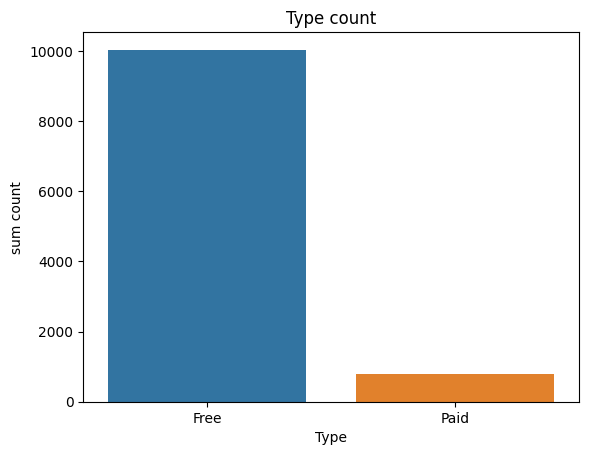

In [ ]:
sns.countplot(data = df , x ='Type')
plt.xlabel('Type')
plt.ylabel('sum count')
plt.title('Type count')
plt.show()

In [ ]:
df['Type'].fillna('Free' , inplace = True)

In [ ]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

<Axes: >

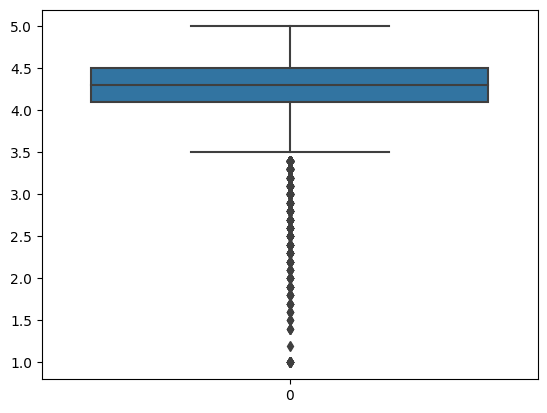

In [ ]:
sns.boxplot(df['Rating'])

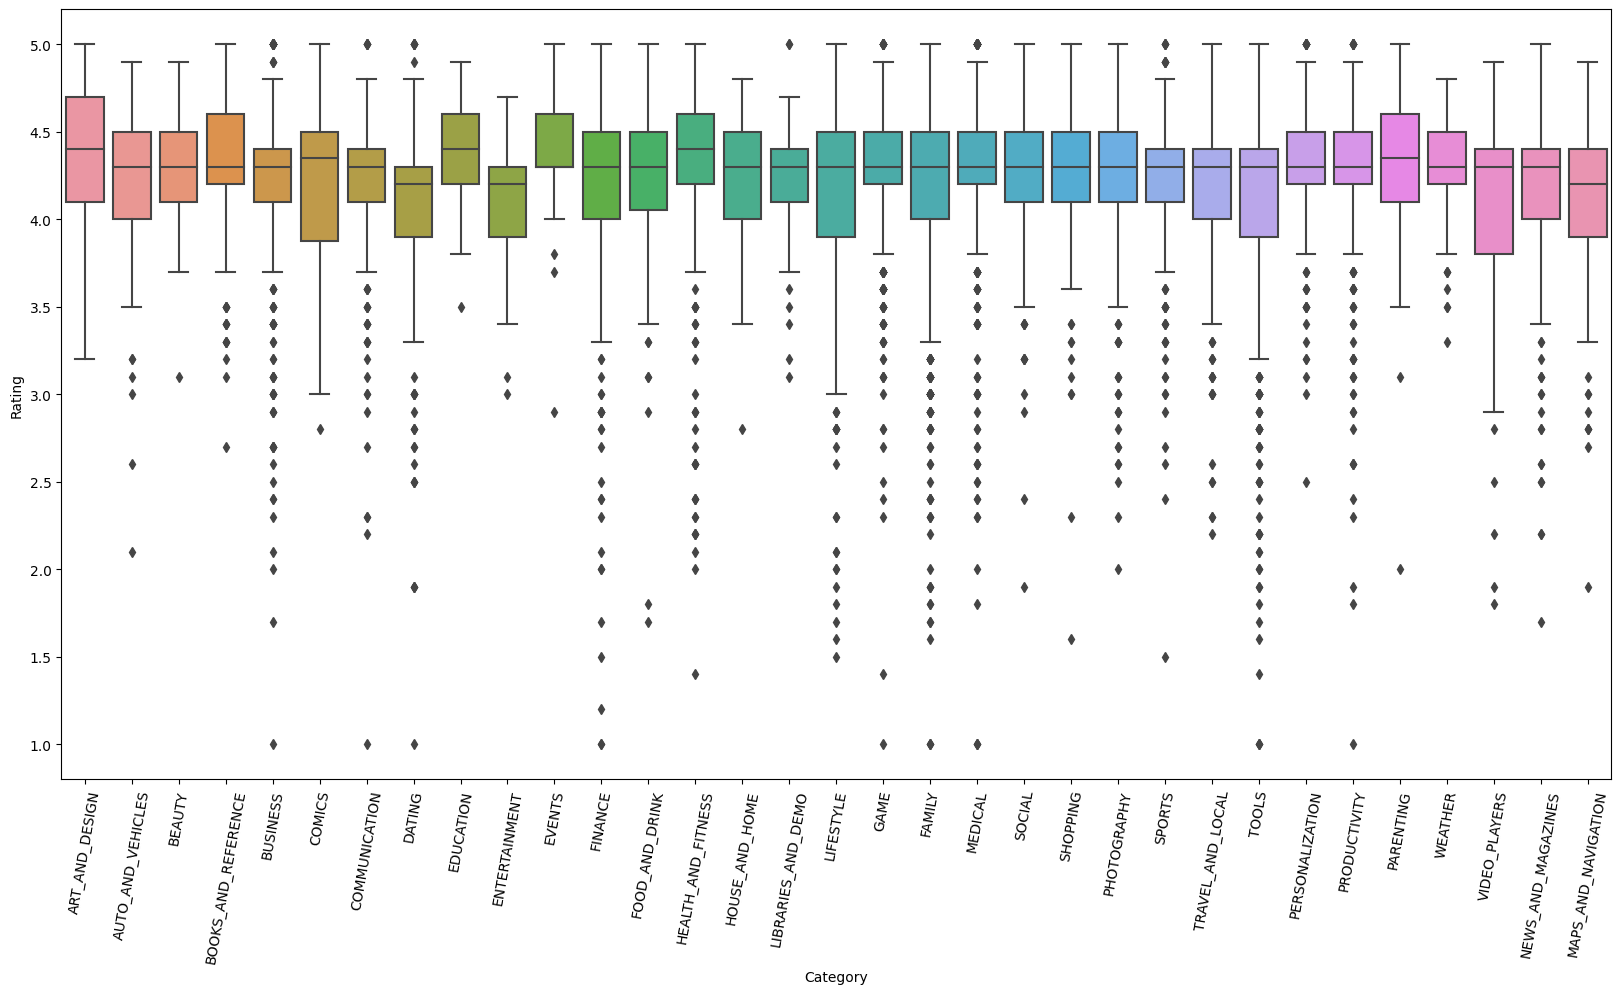

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(y= 'Rating' , x= 'Category' , data = df)
plt.xticks(rotation = 80)
plt.show()

In [ ]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

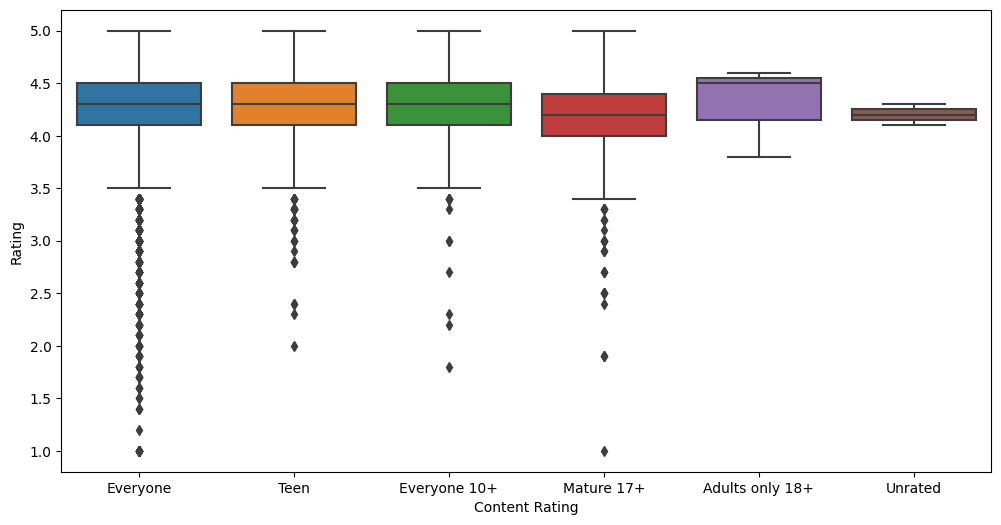

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Content Rating' , y = 'Rating' , data = df)
plt.show()

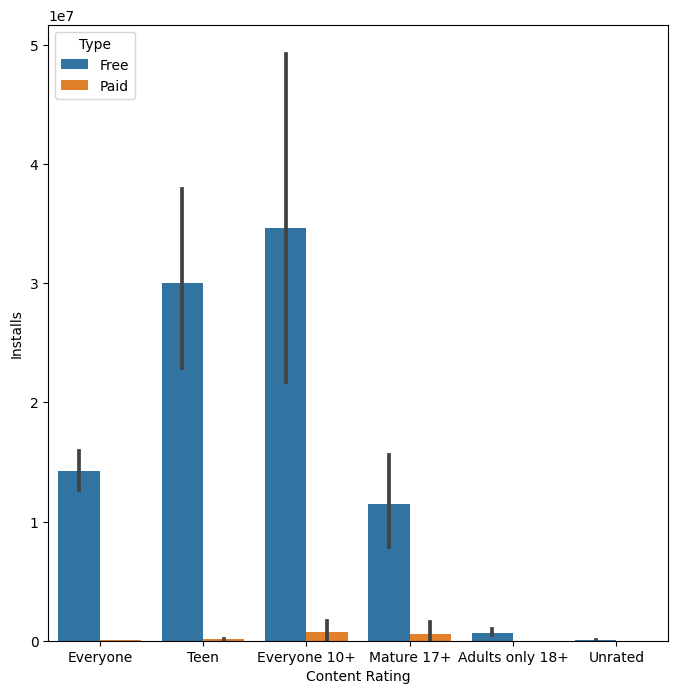

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'Content Rating' , y ='Installs' , hue = 'Type' , data = df)
plt.show()

<Axes: xlabel='Rating', ylabel='Density'>

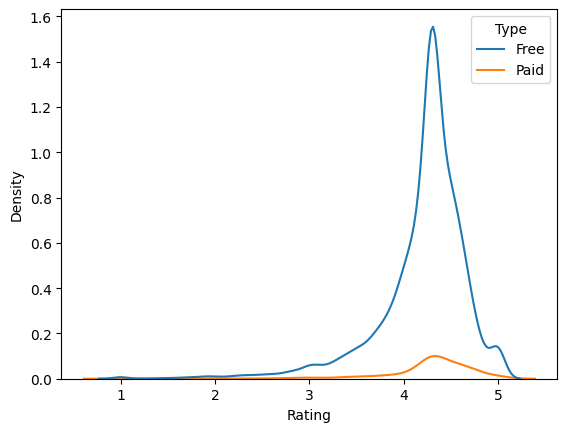

In [ ]:
sns.kdeplot(data = df , x = 'Rating' , hue ='Type')

<Axes: xlabel='Size', ylabel='Density'>

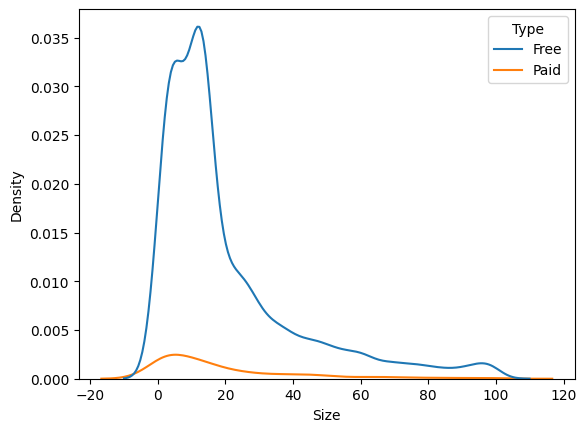

In [ ]:
sns.kdeplot(data = df , x = 'Size' , hue ='Type')

In [ ]:
fig = plt.gcf()
fig

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
Target = 'Rating'
X = df.copy().drop([Target] , axis =1)
y = df.copy()[Target]

In [ ]:
X.head(6)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,167,5.6,50000,Free,0.0,Everyone,Art & Design


In [ ]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

#**Data splitting and modeling**


In [ ]:
from sklearn.model_selection import train_test_split
X_Train , X_test , y_train , y_test = train_test_split(X, y , test_size =0.2 , random_state =2)

In [ ]:
feature_to_encoded = X_Train.select_dtypes(include = ['category' , 'object']).columns
feature_to_encoded

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres'], dtype='object')

In [ ]:
from collections import defaultdict
le_dict =  defaultdict()

In [ ]:
le_dict

defaultdict(None, {})

In [ ]:
from sklearn.preprocessing import LabelEncoder


for col in feature_to_encoded:
  le =LabelEncoder()
  X_Train[col] = le.fit_transform(X_Train[col])
  X_Train[col] = X_Train[col].astype('category')

  X_test[col] = le.fit_transform(X_test[col])
  X_test[col] = X_test[col].astype('category')

  le_dict[col] = le


In [ ]:
le_dict

defaultdict(None,
            {'App': LabelEncoder(),
             'Category': LabelEncoder(),
             'Type': LabelEncoder(),
             'Content Rating': LabelEncoder(),
             'Genres': LabelEncoder()})

In [ ]:
numerical_data = X_Train.select_dtypes(exclude=['category' , 'object']).columns

In [ ]:
numerical_data

Index(['Reviews', 'Size', 'Installs', 'Price'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
SE = StandardScaler()

X_Train[numerical_data] = SE.fit_transform(X_Train[numerical_data])
X_test[numerical_data] = SE.fit_transform(X_test[numerical_data])


In [ ]:
X_Train

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
3795,5368,21,-0.084505,-0.344100,-0.068747,0,-0.063485,2,69
7756,7733,25,-0.150038,0.083971,-0.183585,0,-0.063485,1,75
9645,2979,12,-0.150009,-0.891080,-0.183472,0,-0.063485,1,55
8490,2394,11,-0.150033,-0.795953,-0.183585,0,-0.063485,1,48
4757,3653,29,-0.143407,-0.757902,-0.172102,0,-0.063485,1,100
...,...,...,...,...,...,...,...,...,...
1099,5129,12,-0.106326,-0.344100,-0.126167,0,-0.063485,1,55
2514,7133,20,-0.150031,-0.248973,-0.183529,0,-0.063485,1,65
6637,420,25,-0.150035,-0.905349,-0.183575,0,-0.063485,1,75
2575,7861,27,-0.142862,-0.106283,-0.172102,0,-0.063485,1,93


In [ ]:
y_train

3795    4.2
7756    5.0
9645    4.3
8490    4.3
4757    4.6
       ... 
1099    4.6
2514    4.4
6637    4.3
2575    4.6
7336    4.9
Name: Rating, Length: 8672, dtype: float64

In [ ]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [ ]:
y_train_int

3795    4
7756    5
9645    4
8490    4
4757    4
       ..
1099    4
2514    4
6637    4
2575    4
7336    4
Name: Rating, Length: 8672, dtype: int64

#*Modeling*

In [ ]:
Models = ['Linear reg' , 'K NN' , 'Random forest']
dataset =['Train','Test']
Multi_index = pd.MultiIndex.from_product([Models , dataset] , names = ['Models' , 'dataset'])
matrix_clf_mod = pd.DataFrame(index = Multi_index , columns =['Accuracy %'])

In [ ]:
matrix_clf_mod

Accuracy %
Models        dataset           
Linear reg    Train          NaN
              Test           NaN
K NN          Train          NaN
              Test           NaN
Random forest Train          NaN
              Test           NaN

In [ ]:
from sklearn.linear_model import LinearRegression
lin_clf = LinearRegression()
lin_clf.fit(X_Train , y_train_int)

LinearRegression()

In [ ]:
matrix_clf_mod.loc['Linear reg', 'Train'] = lin_clf.score(X_Train , y_train_int)
matrix_clf_mod.loc['Linear reg', 'Test'] = lin_clf.score(X_test , y_test_int)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_Train , y_train_int)

KNeighborsClassifier()

In [ ]:
matrix_clf_mod.loc['K NN', 'Train'] = knn_clf.score(X_Train , y_train_int)
matrix_clf_mod.loc['K NN', 'Test'] = knn_clf.score(X_test , y_test_int)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_Train, y_train_int)

RandomForestClassifier()

In [ ]:
matrix_clf_mod.loc['Random forest' , 'Train'] = rfc_clf.score(X_Train, y_train_int)
matrix_clf_mod.loc['Random forest' , 'Test'] = rfc_clf.score(X_test, y_test_int)

In [ ]:
matrix_clf_mod['Accuracy %'] = matrix_clf_mod['Accuracy %'].apply(lambda v: round(v*100, ndigits=2))
matrix_clf_mod.loc['Linear reg' , 'Train'] = matrix_clf_mod.loc['Linear reg' , 'Train']*100
matrix_clf_mod.loc['Linear reg' , 'Test'] = matrix_clf_mod.loc['Linear reg' , 'Test']*100
matrix_clf_mod

Accuracy %
Models        dataset            
Linear reg    Train         70.00
              Test          37.00
K NN          Train         81.13
              Test          74.17
Random forest Train        100.00
              Test          79.01

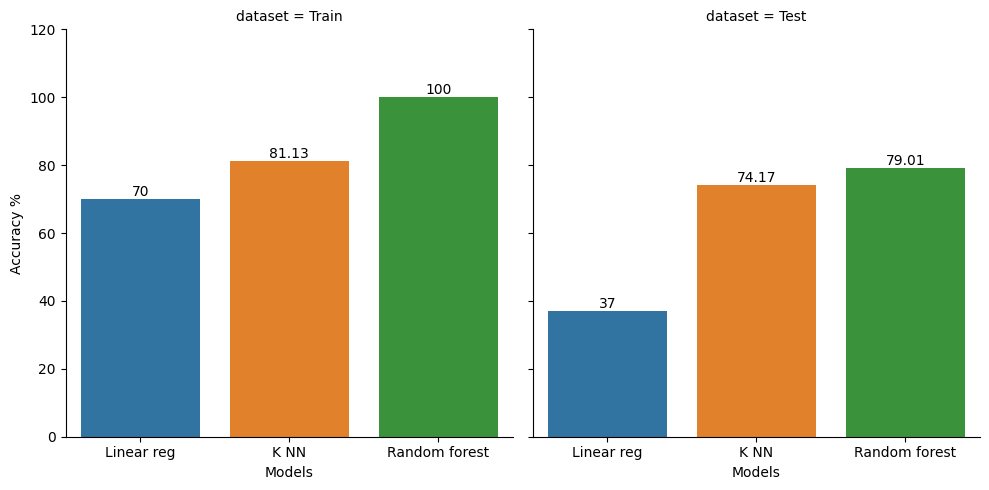

In [ ]:
data = matrix_clf_mod.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='Models', y='Accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

#Random forest will give the best results in classification of data
